In [79]:
#!pip install mlxtend

In [80]:
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=gkenq&logNo=10188110816
# https://wikidocs.net/123595 

In [81]:
dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]

In [82]:
#dataset unique
u_dataset = []

for i in dataset:
    for j in i:
        if j not in u_dataset:
            u_dataset.append(j)
u_dataset

['사과', '치즈', '생수', '호두', '고등어', '수박', '옥수수']

In [83]:
# dataset unique correct
import numpy as np
tmp = []
for x in dataset:
    for j in x:
        tmp.append(j)
np.unique(tmp)

array(['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두'], dtype='<U3')

In [84]:
np.unique(dataset)

C:\Users\TH\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


array([list(['사과', '치즈', '생수']), list(['생수', '호두', '치즈', '고등어']),
       list(['생수', '호두', '치즈', '옥수수']), list(['수박', '사과', '생수'])],
      dtype=object)

In [85]:
items_tmp =[]
items = np.unique(tmp)
for i in dataset:
    t =[]
    for j in items:
        if j in i:
            t.append(True)
        else :
            t.append(False)
    items_tmp.append(t)


In [86]:
items_tmp =[]
items = np.unique(tmp)
for i in dataset:
    t =[True if x in i else False for x in items]
    items_tmp.append(t)

In [87]:
items_tmp

[[False, True, True, False, False, True, False],
 [True, False, True, False, False, True, True],
 [False, True, True, True, False, False, False],
 [False, False, True, False, True, True, True]]

In [88]:
import pandas as pd
df = pd.DataFrame(items_tmp,columns=['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두'])
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [89]:
from mlxtend.preprocessing import TransactionEncoder

In [90]:
te =TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False,  True,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True,  True],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True, False,  True,  True,  True]])

In [91]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [92]:
for col in range(len(df.columns)):
    cnt = 0
    for row in range(len(df)):
        if df.iloc[row,0]==True:
            cnt +=1
    print(df.columns[col],cnt)

고등어 1
사과 1
생수 1
수박 1
옥수수 1
치즈 1
호두 1


In [93]:
## 지지도 신뢰도
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df,use_colnames=True)
print(frequent_itemsets)


frequent_itemsets =apriori(df,min_support=0.1,use_colnames=True) #min support 안하면 디폴트 0.5, 0으로 하면 안된다. 0.01정도로
# 직접 구해보는것도 코딩실력에 도움이 많이 된다

   support      itemsets
0     0.50          (사과)
1     1.00          (생수)
2     0.75          (치즈)
3     0.50          (호두)
4     0.50      (사과, 생수)
5     0.75      (치즈, 생수)
6     0.50      (호두, 생수)
7     0.50      (호두, 치즈)
8     0.50  (호두, 치즈, 생수)


In [94]:
## 특정갯수 이상의 item만 추출
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) 
frequent_itemsets[frequent_itemsets['length'] >=2] 

,support,itemsets,length
7,0.25,"(생수, 고등어)",2
8,0.25,"(치즈, 고등어)",2
9,0.25,"(호두, 고등어)",2
10,0.50,"(사과, 생수)",2
11,0.25,"(수박, 사과)",2
12,0.25,"(치즈, 사과)",2
13,0.25,"(수박, 생수)",2
14,0.25,"(옥수수, 생수)",2
15,0.75,"(치즈, 생수)",2
16,0.50,"(호두, 생수)",2


In [95]:
# # 특정 아이템(치즈)이 포함된 것만 추출
frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: '치즈' in x)] 

,support,itemsets,length
5,0.75,(치즈),1
8,0.25,"(치즈, 고등어)",2
12,0.25,"(치즈, 사과)",2
15,0.75,"(치즈, 생수)",2
17,0.25,"(옥수수, 치즈)",2
19,0.50,"(호두, 치즈)",2
20,0.25,"(생수, 치즈, 고등어)",3
22,0.25,"(호두, 치즈, 고등어)",3
24,0.25,"(치즈, 사과, 생수)",3
25,0.25,"(옥수수, 치즈, 생수)",3


In [96]:
from mlxtend.frequent_patterns import apriori,association_rules

# metric 에는 지지도(support), 신뢰도(confidence), 향상도(lift) 사용가능
# 값의 최소옵션은 min_threshold에 기입함.

rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
#association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
# confidecnts는 a가 b에 종속된 정도

rules=association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rules
# antecedents 가 a
# condequents 가 b

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(호두),(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
1,(고등어),(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
2,(수박),(사과),0.25,0.50,0.25,1.0,2.0,0.125,inf
3,(사과),(수박),0.50,0.25,0.25,0.5,2.0,0.125,1.5
4,(옥수수),(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
5,(호두),(옥수수),0.50,0.25,0.25,0.5,2.0,0.125,1.5
6,"(호두, 생수)",(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
7,"(고등어, 생수)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
8,(호두),"(고등어, 생수)",0.50,0.25,0.25,0.5,2.0,0.125,1.5
9,(고등어),"(호두, 생수)",0.25,0.50,0.25,1.0,2.0,0.125,inf


In [97]:
# lift값이 가장 큰 값
rules[rules.antecedents == {'생수'}].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [98]:
# 특정단어가 있는 자료 찾기,위에서 한 내용임
rules[rules.antecedents.apply(lambda x: '생수' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(호두, 생수)",(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
7,"(고등어, 생수)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
14,"(수박, 생수)",(사과),0.25,0.50,0.25,1.0,2.0,0.125,inf
15,"(사과, 생수)",(수박),0.50,0.25,0.25,0.5,2.0,0.125,1.5
18,"(옥수수, 생수)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
19,"(호두, 생수)",(옥수수),0.50,0.25,0.25,0.5,2.0,0.125,1.5
26,"(호두, 치즈, 생수)",(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
27,"(고등어, 치즈, 생수)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
28,"(호두, 생수)","(치즈, 고등어)",0.50,0.25,0.25,0.5,2.0,0.125,1.5
29,"(고등어, 생수)","(호두, 치즈)",0.25,0.50,0.25,1.0,2.0,0.125,inf


In [99]:
from apyori import apriori
result=(list(apriori(dataset, min_support=0.01)))
df=pd.DataFrame(result)
df[:5]

,items,support,ordered_statistics
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]"
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]"
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]"
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]"
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]"


In [100]:
## 이건 내 자료로 해보고 있음.
r=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
tmp=pd.DataFrame(r)
display(tmp[:5])

tmp['length']=tmp['antecedents'].apply(lambda x: len(x))
tmp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(호두),(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000,1
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf,1
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,1
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf,1
4,(호두),(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500,1
...,...,...,...,...,...,...,...,...,...,...
103,"(치즈, 생수)","(옥수수, 호두)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,2
104,(옥수수),"(호두, 치즈, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf,1
105,(호두),"(옥수수, 치즈, 생수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500,1
106,(치즈),"(옥수수, 호두, 생수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,1


In [103]:
# 글자길이
df['length']=df['items'].apply(lambda x: len(x))
df[:5]

,items,support,ordered_statistics,length
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]",1
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]",1
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]",1
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]",1
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]",1


In [105]:
# 필수는 아닌것 같음
df=df[(df['length']==2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)
df.head(10)

,items,support,ordered_statistics,length
15,"(치즈, 생수)",0.75,"[((), (치즈, 생수), 0.75, 1.0), ((생수), (치즈), 0.75,...",2
10,"(사과, 생수)",0.50,"[((), (사과, 생수), 0.5, 1.0), ((사과), (생수), 1.0, 1...",2
16,"(호두, 생수)",0.50,"[((), (호두, 생수), 0.5, 1.0), ((생수), (호두), 0.5, 1...",2
19,"(호두, 치즈)",0.50,"[((), (호두, 치즈), 0.5, 1.0), ((치즈), (호두), 0.6666...",2
7,"(생수, 고등어)",0.25,"[((), (고등어, 생수), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(치즈, 고등어)",0.25,"[((), (치즈, 고등어), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(호두, 고등어)",0.25,"[((), (호두, 고등어), 0.25, 1.0), ((고등어), (호두), 1.0...",2
11,"(수박, 사과)",0.25,"[((), (수박, 사과), 0.25, 1.0), ((사과), (수박), 0.5, ...",2
12,"(치즈, 사과)",0.25,"[((), (치즈, 사과), 0.25, 1.0), ((사과), (치즈), 0.5, ...",2
13,"(수박, 생수)",0.25,"[((), (수박, 생수), 0.25, 1.0), ((생수), (수박), 0.25,...",2


In [106]:
import networkx as nx
G=nx.Graph()
ar=(df['items'])
G.add_edges_from(ar)
ar

15     (치즈, 생수)
10     (사과, 생수)
16     (호두, 생수)
19     (호두, 치즈)
7     (생수, 고등어)
8     (치즈, 고등어)
9     (호두, 고등어)
11     (수박, 사과)
12     (치즈, 사과)
13     (수박, 생수)
14    (옥수수, 생수)
17    (옥수수, 치즈)
18    (옥수수, 호두)
Name: items, dtype: object

In [107]:
G1=nx.Graph()
ar1=tmp['antecedents']; G1.add_edges_from(ar)
ar1

0          (생수)
1         (고등어)
2          (치즈)
3         (고등어)
4          (호두)
         ...   
103    (치즈, 생수)
104       (옥수수)
105        (호두)
106        (치즈)
107        (생수)
Name: antecedents, Length: 108, dtype: object

In [109]:
pr=nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
nsize

array([1450.1405505 , 2000.        ,  506.37981884,  933.20920045,
        429.68501826,    0.        ,  429.68501826])

In [110]:
pos=nx.planar_layout(G1)
pos

{'치즈': array([-1.        , -0.36585366]),
 '생수': array([0.19512195, 0.14634146]),
 '사과': array([-0.31707317,  0.31707317]),
 '호두': array([ 0.36585366, -0.19512195]),
 '고등어': array([ 0.70731707, -0.36585366]),
 '수박': array([-0.14634146,  0.48780488]),
 '옥수수': array([ 0.19512195, -0.02439024])}

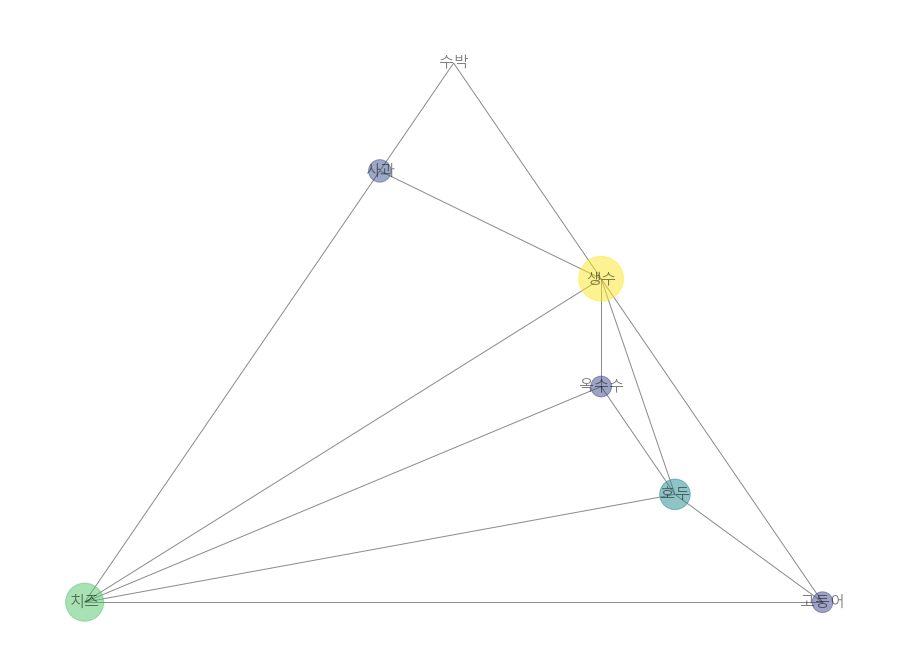

In [111]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/windows/fonts/malgun.ttf"
plt.figure(figsize=(16,12)); plt.axis('off')
fname = fm.FontProperties(fname=font_path).get_name()


#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G, pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)